# Decision Tree Case Study Assignement: Malignant Tumors Research
Marissa McKee

The Wisconsin Breast Cancer data consists of attribute information on fineneedle aspirated breast tissue from 569 women. Information on each sample includes: 

- Column A: Patient ID number 

- Column B: Diagnosis (M = malignant, B = benign) 

- Columns C – AF: Summary statistics on ten real-valued features computed from each cell nucleus in a sample

    - a) radius (mean of distances from center to points on the perimeter)

    - b) texture (standard deviation of gray-scale values)

    - c) perimeter

    - d) area

    - e) smoothness (local variation in radius lengths)

    - f) compactness (perimeter^2 / area - 1.0)

    - g) concavity (severity of concave portions of the contour)

    - h) concave points (number of concave portions of the contour)

    - i) symmetry

    - j) fractal dimension ("coastline approximation")

For each feature, the mean, standard deviation, and "worst" or largest (mean of the three largest values) were computed for each sample, resulting in 30 measurements. For example, column C is Mean Radius (of cells measured in biopsy), column M is Radius SD (of cells measured in biopsy), column W is Worst Radius (worst cell radius measured in biopsy).

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn import datasets
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn import tree
from sklearn.model_selection import cross_val_score, LeaveOneOut
from scipy.stats import sem
import seaborn as sns
from matplotlib import pyplot as plt
from pandasql import sqldf

C:\Users\mckee\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Read breast_cancer_data.sav 
df, meta = pyreadstat.read_sav("breast_cancer_data.sav")
df.head()

,PatientID,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePtsMean,...,RadiusWorse,TextureWorse,PerimeterWorse,AreaWorse,SmoothnessWorse,CompactnessWorse,ConcavityWorse,ConcavePtsWorse,SymmetryWorse,FactalDimWorse
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Dummy Variable Creation for Malignant Tumors

In [3]:
# Create dummy variable for malignant diagnosis
df['Malignant'] = np.where((df.Diagnosis == 'M'),1,0)

In [4]:
# View the columns in the dataframe
df.columns

Index(['PatientID', 'Diagnosis', 'RadiusMean', 'TextureMean', 'PerimeterMean',
       'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
       'ConcavePtsMean', 'SymmetryMean', 'FactalDimMean', 'RadiusSD',
       'TextureSD', 'PerimeterSD', 'AreaSD', 'SmoothnessSD', 'CompactnessSD',
       'ConcavitySD', 'ConcavePtsSD', 'SymmetrySD', 'FactalDimSD',
       'RadiusWorse', 'TextureWorse', 'PerimeterWorse', 'AreaWorse',
       'SmoothnessWorse', 'CompactnessWorse', 'ConcavityWorse',
       'ConcavePtsWorse', 'SymmetryWorse', 'FactalDimWorse', 'Malignant'],
      dtype='object')

### Null Handling

One record is dropped from the dataset which is mostly null and likely a mistake.

In [5]:
# Check for nulls
df.isnull().any()

PatientID            True
Diagnosis           False
RadiusMean          False
TextureMean          True
PerimeterMean        True
AreaMean             True
SmoothnessMean       True
CompactnessMean      True
ConcavityMean        True
ConcavePtsMean       True
SymmetryMean         True
FactalDimMean        True
RadiusSD             True
TextureSD            True
PerimeterSD          True
AreaSD               True
SmoothnessSD         True
CompactnessSD        True
ConcavitySD          True
ConcavePtsSD         True
SymmetrySD           True
FactalDimSD          True
RadiusWorse          True
TextureWorse         True
PerimeterWorse       True
AreaWorse            True
SmoothnessWorse      True
CompactnessWorse     True
ConcavityWorse       True
ConcavePtsWorse      True
SymmetryWorse        True
FactalDimWorse       True
Malignant           False
dtype: bool

In [6]:
# Null handling 
df = df.dropna()

In [7]:
# (row count,column count)
df.shape

(569, 33)

In [8]:
# Export clean data to csv
df.to_csv(r'clean_breast_cancer_data.csv', index = False)

## Breast Cancer EDA

#### Visualize Malignant Tumor Count

Malignant tumors are our dependent variable and what I'll be focussing on for this project.

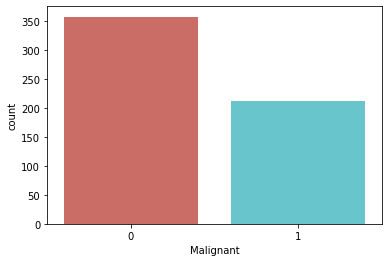

In [9]:
# Visualize results of Diagnosis dummy variable
sns.countplot(x='Malignant', data=df, palette='hls')
plt.show()

#### Descriptive Statistics

In [10]:
# Descriptive stats
df.describe()

,PatientID,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePtsMean,SymmetryMean,...,TextureWorse,PerimeterWorse,AreaWorse,SmoothnessWorse,CompactnessWorse,ConcavityWorse,ConcavePtsWorse,SymmetryWorse,FactalDimWorse,Malignant
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Box Plots 

Box plots are created for the mean of each of the 10 features. 

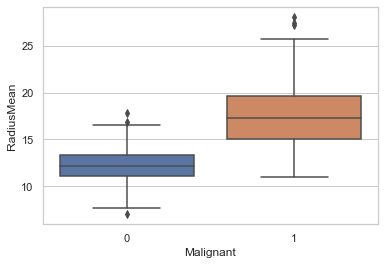

In [11]:
# Create a box plot malignant vs radius mean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="RadiusMean", data=df)

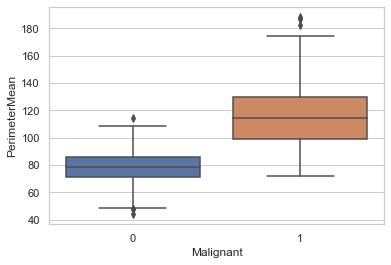

In [12]:
# Create a box plot malignant vs PerimeterMean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="PerimeterMean", data=df)

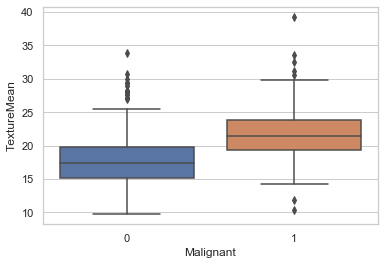

In [13]:
# Create a box plot malignant vs texture mean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="TextureMean", data=df)

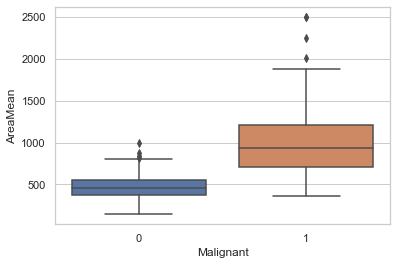

In [14]:
# Create a box plot malignant vs area mean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="AreaMean", data=df)

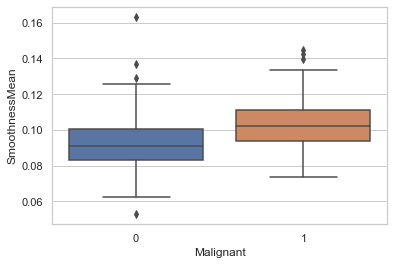

In [15]:
# Create a box plot malignant vs smoothness mean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="SmoothnessMean", data=df)

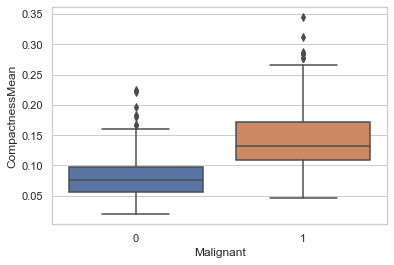

In [16]:
# Create a box plot malignant vs CompactnessMean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="CompactnessMean", data=df)

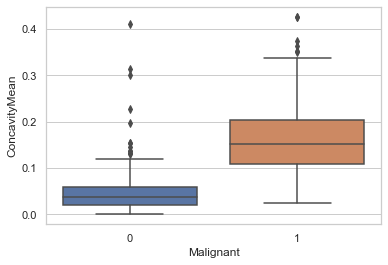

In [17]:
# Create a box plot malignant vs ConcavityMean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="ConcavityMean", data=df)

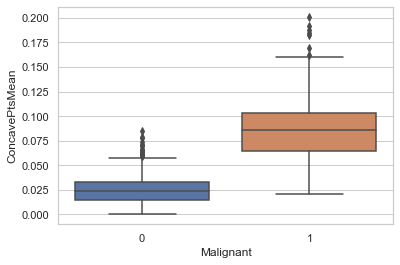

In [18]:
# Create a box plot malignant vs ConcavePtsMean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="ConcavePtsMean", data=df)

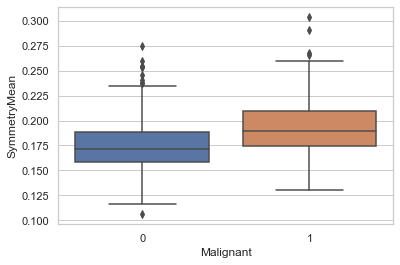

In [19]:
# Create a box plot malignant vs SymmetryMean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="SymmetryMean", data=df)

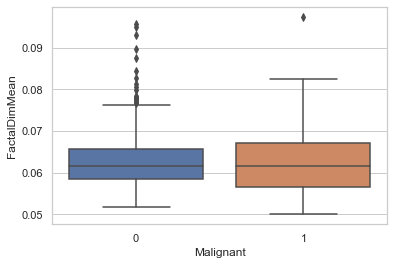

In [20]:
# Create a box plot malignant vs FactalDimMean 
sns.set(style="whitegrid")
ax = sns.boxplot(x="Malignant", y="FactalDimMean", data=df)

#### Correlation Matrices

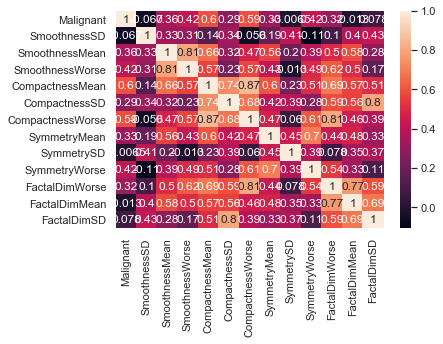

In [21]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT Malignant
                , SmoothnessSD
                , SmoothnessMean
                , SmoothnessWorse
                , CompactnessMean 
                , CompactnessSD
                , CompactnessWorse
                , SymmetryMean
                , SymmetrySD 
                , SymmetryWorse
                , FactalDimWorse
                , FactalDimMean 
                , FactalDimSD
                FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

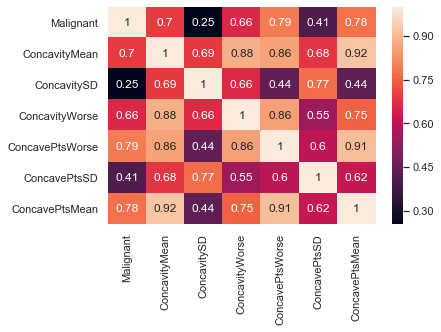

In [22]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT Malignant
                , ConcavityMean
                , ConcavitySD
                , ConcavityWorse
                , ConcavePtsWorse
                , ConcavePtsSD
                , ConcavePtsMean
                FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

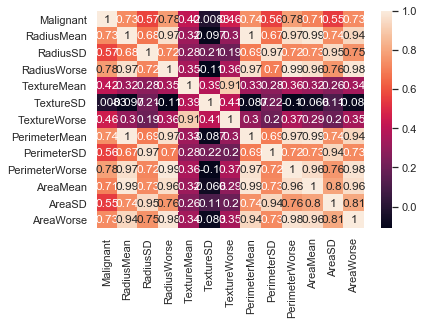

In [23]:
# Create a DataFrame for sql query below
dfSQL = sqldf('''SELECT 
                Malignant
                , RadiusMean 
                , RadiusSD
                , RadiusWorse
                , TextureMean
                , TextureSD
                , TextureWorse
                , PerimeterMean
                , PerimeterSD
                , PerimeterWorse 
                , AreaMean
                , AreaSD 
                , AreaWorse
                FROM df;''')


# Create a correlation matrix and heat map for the SQL query specified above
corrMatrix = dfSQL.corr()
sns.heatmap(corrMatrix, annot=True)

#### Scatter Plot Malignant vs Radius Mean

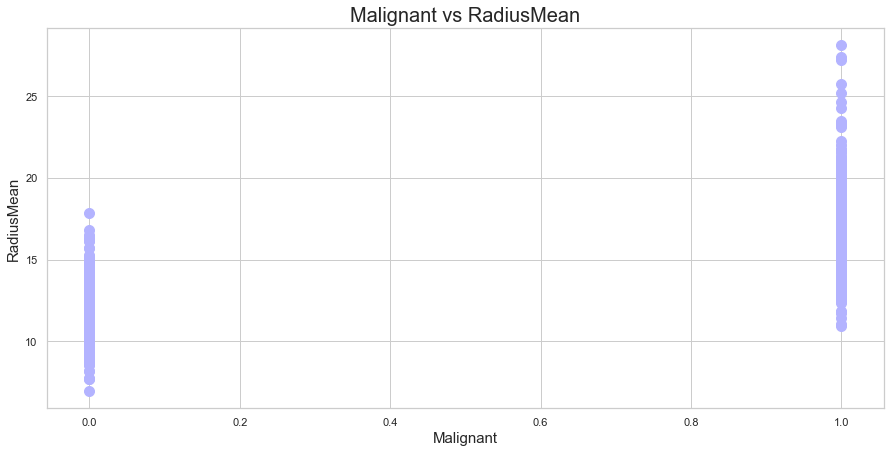

In [24]:
# Scatter plot
plt.figure(figsize=(15,7))
plt.scatter(df['Malignant'],df['RadiusMean'],s=100,marker='o',color='#b3b3ff')
plt.title('Malignant vs RadiusMean',fontsize=20)  
plt.xlabel('Malignant',fontsize=15)  
plt.ylabel('RadiusMean',fontsize=15)  
plt.show()

# Breast Cancer Decision Tree 

### Feature engineering
Here we select the features we want to include in the decisoin tree model. I've decided to analyze the means of each tumor characteristic. 

In [25]:
# Split dataset in features and target variable
feature_cols = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean','CompactnessMean','ConcavityMean'
               ,'ConcavePtsMean', 'SymmetryMean', 'FactalDimMean']

# Features
X = np.array(df[feature_cols])

# Target
y = np.array(df.Malignant) 


### K Fold Cross Validation 

This section randomly splits the dataset into K folds. For each K fold, the model is built around K-1 folds of the dataset. The model is tested for effectiveness on the Kth fold. The average of the K recorded errors is called the cross-validation error. 

In [26]:
# K fold cross validation
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [  1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  56  57
  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  90  91  92  93  94  95
  96  97  98  99 100 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 125 126 127 128 129 130 131 133 134
 135 136 137 138 139 140 141 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 191 192 193
 194 196 197 198 199 200 202 203 204 205 206 207 208 209 210 211 212 214
 215 216 217 218 220 221 222 225 226 227 228 229 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 260 261 262 263 265 266 267 269

 561 562 563 564 565 566 567 568] Validation: [  2   8   9  22  25  32  42  58  62  85  95 140 141 162 165 172 192 204
 210 222 231 249 252 271 280 293 313 338 339 353 355 367 369 379 380 382
 394 397 409 411 432 444 446 458 462 468 472 477 484 496 500 514 515 525
 538 542 547]
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  31  32  34  35  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  95
  96  97  98  99 100 102 103 104 105 106 107 109 110 112 113 114 115 117
 118 119 120 121 122 124 125 127 129 130 131 132 133 134 135 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 171 172 173 174 175 176 177
 179 181 182 183 184 185 186 187 188 189 190 191 192 193 

## Decision Tree Classifier

Here I'm using a scikit learn decision tree classifier and tuning the hyperparameters. 

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                            min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features=None,
                            random_state=None, min_impurity_decrease=0.0,
                            class_weight=None, presort='auto')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

### Accuracy 

Below is the accuracy measurement of how often the classifier is correct.

In [28]:
# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9642857142857143


### Visualize Results

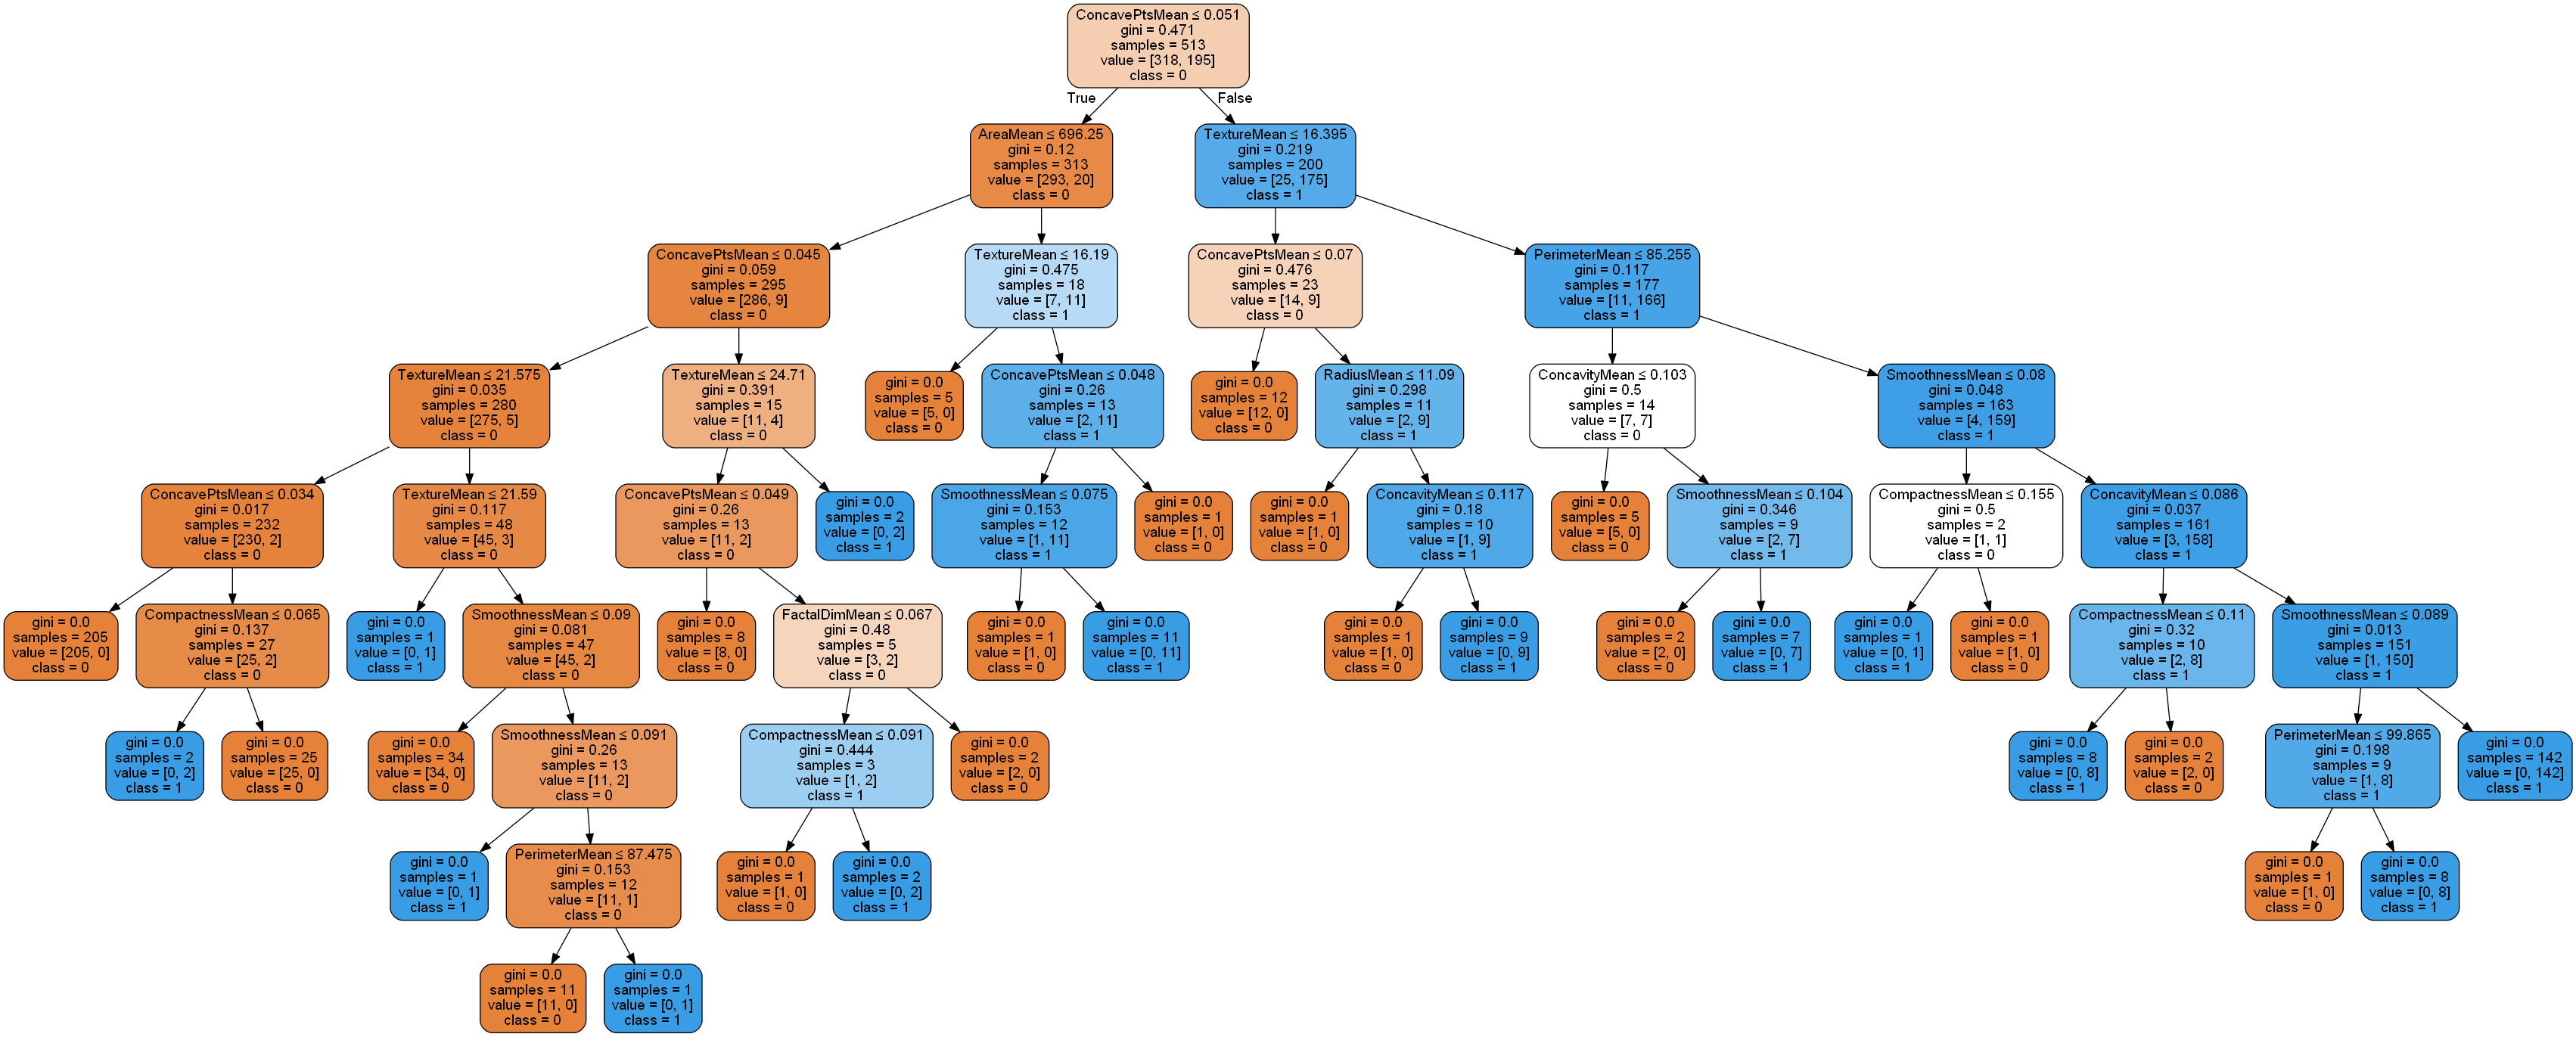

In [29]:
# Visualize the results of the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,  
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diagnosis.png')
Image(graph.create_png())

### Optimize Decision Tree Results

Below I've changed the hyperparameters to use entropy instead of gini and a max tree depth of 3 to see if that makes a difference in the accuracy of the model. 

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",splitter='best', max_depth=3,
                            min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features=None,
                            random_state=None, min_impurity_decrease=0.0,
                            class_weight=None, presort='auto')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9464285714285714


### Visualize Results

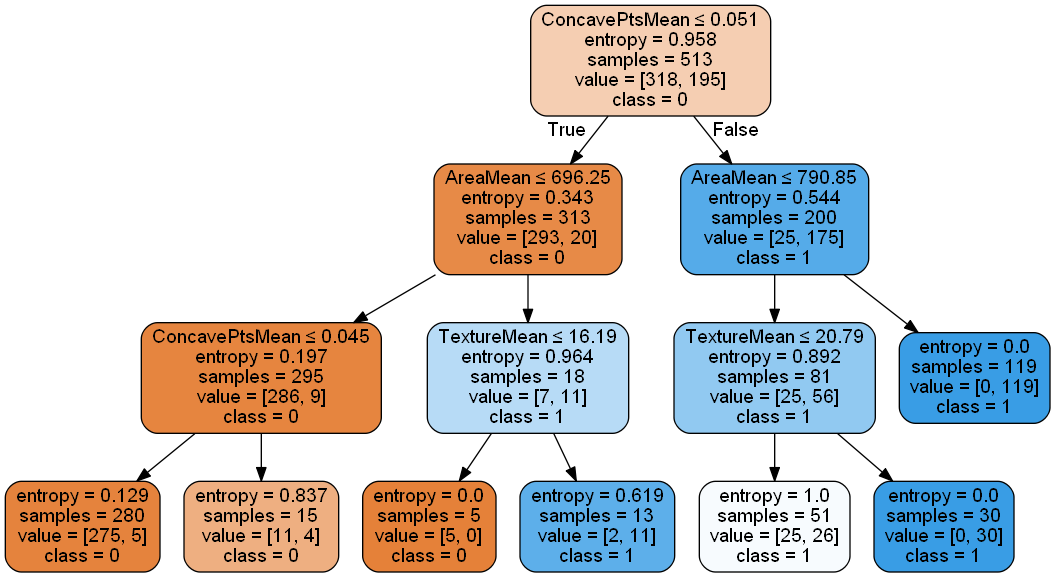

In [31]:
# Visualize the results of the optimized decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diagnosis_optimize.png')
Image(graph.create_png())